# Notebook 10 - Continuación con Redes Neuronales Multicapa.

*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1. ¿Qué tan robusto es tu modelo?

Ayer comprobamos que haciendo uso de simple Red Neuronal Multicapa podemos obtener un buen rendimiento (aprox. 95%) de acierto en la predicción de números de MNIST. Pero... ¿Qué tan robusto es tu modelo? O dicho de otra manera, ¿cómo se ven afectadas las predicciones de tu modelo cuándo aparecen variaciones en tus datos de entrada?.

Es decir, imagínate que las imágenes que le pasamos al modelo, se generan a partir de tomar una foto al dígito escrito manualmente con tu movil. Es probable que algunas de las fotos que queramos predecir no estén centradas (ej. a) o no correctamente alineadas (ej. b) o sufran de mala calidad (ej. c). ¿Crees que esto puede afectar al rendimiento de tu modelo?

> ![texto alternativo](https://i.imgur.com/qs86wF1.jpg)

---

**Tu tarea:** Copia el código implementado ayer en Keras que entrena a tu red neuronal para predecir valores del dataset MNIST. Una vez lo tengas entrenado, realiza lo siguiente:

1. (**bonus**) ¿Es necesario reentrenar siempre que quieras utilizar tu modelo? Investiga si hay alguna forma de guardar tus modelos entrenados, para así volver a cargarlos en un futuro cuando quieras utilizarlo. 
2. Evalua los datos que tienes en tu ***test_set***. Después utiliza tu ***test_set*** para generar tres test de pruebas diferentes que incluyan las distorsiones que hemos mencionado antes (translaciones, rotaciones, y ruido 25% y ruido 50%). Por ejemplo, una translación la puedes conseguir cogiendo el vector de entrada de una de las imágenes, y eliminando columnas por la derecha/izquierda y arriba/abajo de la imagen, y rellenando con 0s las nuevas zonas de la imagen (o directamente usando las bondades de ***scipy.ndimage.shift()***). Una rotación es más complejo, pero por suerte scipy incluye funcionalidades que te pueden facilitar el trabajo (ej. ***scipy.ndimage.rotate()***). Finalmente, añadir ruido es simplemente, sumar a cada uno de los píxeles de tu imagen valores aleatorios (controla que en cualquier caso la intensidad de los píxeles se mantenga en el rango de valores esperados). Consigue que en cada dataset el grado de distorsión (ej. grado de inclinación) varíe por imagen. Visualiza algunas de estas imágenes distorsionadas.

> **En traslación no cortes más del 25% de la imagen por cada eje. En rotación no rotes más de 90º. En ruido, añade una cantidad máxima de ruido de +-0.25 y +-0.5 (25% Ruido y 50% Ruido).**

3. Antes de evaluar tus datasets distorsionas... Entendiendo el funcionamiento de la arquitectura de la Red Neuronal Multicapa ¿Cómo esperas que se va a comportar tu modelo?¿Soportará estas distorsiones?

4. Evalua las predicciones para cada uno de los datasets y compara los resultados obtenidos. ¿Se te ocurre alguna forma de evitar esto?

5. Utiliza la mismas funciones que has utilizado para distorsionar tus imágenes y genera imágenes distorsionadas de los elementos de tu ***training_set***. Genera con todas estas imágenes y las originales en tu ***training_set*** un nuevo ***training_set*** aumentado (a este proceso se le denomina ***Data Augmentation***). Entrena a tu modelo nuevamente con este training_set aumentado y obtén evaluaciones de nuevo de los ***test_set distorsionados*** que habíamos generado previamente. ¿Mejora la cosa?

In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Cargamos el dataset desde el archivo.
mnist = pd.read_csv("./sample_data/mnist_train_small.csv", header=None).as_matrix()

# Guardamos las variables X e Y.
X, Y = mnist[:, 1:], mnist[:, 0:1]

In [0]:
import tensorflow as tf

from tensorflow.keras.layers     import Dense
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras.optimizers import SGD

from sklearn.model_selection import train_test_split

# Normalizamos input y codificamos output con one-hot encoding.
Xt = X / 255
Yt = to_categorical(Y, 10)

# Generamos train y test set.
X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, train_size=0.7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
# Inicializamos el modelo.
model = tf.keras.Sequential()

# Adds a densely-connected layer with 64 units to the model:
model.add(Dense(128, activation='relu'))
# Add another:
model.add(Dense(64,  activation='relu'))
# Add another:
model.add(Dense(32,  activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(10, activation='softmax'))

# Configure a model for mean-squared error regression.
model.compile(optimizer=SGD(lr=0.05),
              loss='categorical_crossentropy',   # mean squared error
              metrics=['acc'])              # mean absolute error


arr = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Train on 14000 samples, validate on 6000 samples
Epoch 1/100
14000/14000 [==============================] - 2s 146us/step - loss: 0.7239 - acc: 0.7808 - val_loss: 0.3238 - val_acc: 0.9095
Epoch 2/100
14000/14000 [==============================] - 1s 90us/step - loss: 0.2730 - acc: 0.9190 - val_loss: 0.3426 - val_acc: 0.9002
Epoch 3/100
14000/14000 [==============================] - 1s 85us/step - loss: 0.2016 - acc: 0.9389 - val_loss: 0.2081 - val_acc: 0.9418
Epoch 4/100
14000/14000 [==============================] - 1s 85us/step - loss: 0.1590 - acc: 0.9529 - val_loss: 0.2662 - val_acc: 0.9230
Epoch 5/100
14000/14000 [==============================] - 1s 86us/step - loss: 0.1264 - acc: 0.9617 - val_loss: 0.1848 - val_acc: 0.9480
Epoch 6/100
14000/14000 [==============================] - 1s 85us/step - loss: 0.1040 - acc: 0.9704 - val_loss: 0.1562 - val_acc: 0.9565
Epoch 7/100
14000/14000 [==============================] - 1s 84us/step - loss: 0.0835 - acc: 0.9766 - val_loss: 0.1578 - 

In [0]:
import numpy.random

from scipy.ndimage import shift
from scipy.ndimage import rotate

def traslate_imgs(X):
  
  # Matriz resultado.
  trasl_X = np.zeros(X.shape)
  
  for ix, x in enumerate(X):
    
    # Convertimos a matriz el vector de píxeles.
    rx = x.reshape(28, 28)
    #r Seleccionamos cuánto vamos a cortar en X e Y.
    shift_x = np.random.randint(14) - 7
    shift_y = np.random.randint(14) - 7
    # Guardamos la traslación de la imagen.
    trasl_X[ix] = shift(x.reshape(28, 28), (shift_x, shift_y)).flatten()
    
  return trasl_X


def rotate_imgs(X):
  
  # Matriz resultado.
  rot_X = np.zeros(X.shape)
  
  for ix, x in enumerate(X):
    
    # Convertimos a matriz el vector de píxeles.
    rx = x.reshape(28, 28)
    # Seleccionamos el ángulo con el que rotar la imagen.
    angle = np.random.randint(180) - 90
    # Guardamos la traslación de la imagen.
    rot_X[ix] = rotate(x.reshape(28, 28), angle, reshape=False).flatten()
    
  return rot_X


def noise_imgs(X, noise_level=0.5):
  
  # Matriz resultado.
  nois_X = np.zeros(X.shape)
  
  for ix, x in enumerate(X):
    
    # Convertimos a matriz el vector de píxeles.
    rx = x.reshape(28, 28)
    # Seleccionamos el ángulo con el que rotar la imagen.
    noise = (np.random.random(X[ix].shape) * 2 - 1) * noise_level
    # Guardamos la traslación de la imagen.
    nois_X[ix] = np.clip(x + noise, 0.0, 1.0).flatten()
    
  return nois_X

In [0]:
# Generamos validación trasladada.
trasX_test = traslate_imgs(X_test)
# Generamos validación rotada.
rotaX_test = rotate_imgs(X_test)
# Generamos validación con ruido 50%.
no50X_test = noise_imgs(X_test, 0.5)
# Generamos validación con ruido 25%.
no25X_test = noise_imgs(X_test, 0.25)

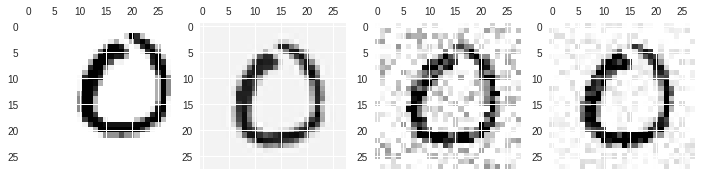

In [0]:
idx = 0

fig, axs = plt.subplots(1,4,figsize=(12,12))

axs[0].matshow(trasX_test[idx,:].reshape(28, 28))
axs[1].matshow(rotaX_test[idx,:].reshape(28, 28))
axs[2].matshow(no50X_test[idx,:].reshape(28, 28))
axs[3].matshow(no25X_test[idx,:].reshape(28, 28))

In [0]:
print("Accuracy datos normales:", model.evaluate(X_test,     Y_test, verbose=0)[1] * 100,"%")
print("Accuracy datos traslad.:", model.evaluate(trasX_test, Y_test, verbose=0)[1] * 100,"%")
print("Accuracy datos rotation:", model.evaluate(rotaX_test, Y_test, verbose=0)[1] * 100,"%")
print("Accuracy datos noise50%:", model.evaluate(no50X_test, Y_test, verbose=0)[1] * 100,"%")
print("Accuracy datos noise25%:", model.evaluate(no25X_test, Y_test, verbose=0)[1] * 100,"%")

Accuracy datos normales: 99.06999982198079 %
Accuracy datos traslad.: 84.45333321889241 %
Accuracy datos rotation: 89.81499846776326 %
Accuracy datos noise50%: 93.96833216349285 %
Accuracy datos noise25%: 98.24833418528239 %


In [0]:
# Generamos train trasladada.
trasX_train = traslate_imgs(X_train)
# Generamos train rotada.
rotaX_train = rotate_imgs(X_train)
# Generamos train con ruido 50%.
no50X_train = noise_imgs(X_train, 0.5)
# Generamos train con ruido 25%.
no25X_train = noise_imgs(X_train, 0.25)

# Juntamos todos los sets.
augmX_train = np.vstack([X_train, 
                        trasX_train, 
                        rotaX_train, 
                        no50X_train, 
                        no25X_train])

# E incrementamos el vector Y por 5 veces.
augmY_train = np.tile(Y_train, (5,1))

# Hacemos una selección aleatoria de los índices del vector.
idxs = np.random.choice(range(augmX_train.shape[0]), augmX_train.shape[0], replace=False)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


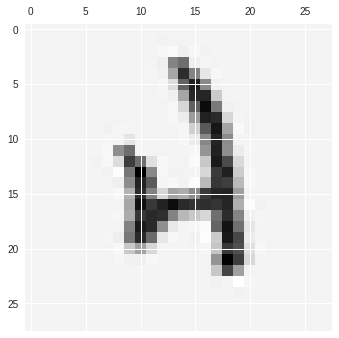

In [0]:
augmX_train.shape

i = 2

plt.matshow(augmX_train[idxs][i,:].reshape(28,28))
print(augmY_train[idxs][i])

In [0]:
# Inicializamos el modelo.
model = tf.keras.Sequential()

# Adds a densely-connected layer with 64 units to the model:
model.add(Dense(128, activation='relu'))
# Add another:
model.add(Dense(64,  activation='relu'))
# Add another:
model.add(Dense(32,  activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(10, activation='softmax'))

# Configure a model for mean-squared error regression.
model.compile(optimizer=SGD(lr=0.05),
              loss='binary_crossentropy',   # mean squared error
              metrics=['acc'])              # mean absolute error

arr = model.fit(augmX_train[idxs], augmY_train[idxs], epochs=25)

Epoch 1/25
70000/70000 [==============================] - 8s 120us/step - loss: 0.2314 - acc: 0.9226
Epoch 2/25
70000/70000 [==============================] - 7s 104us/step - loss: 0.1564 - acc: 0.9492
Epoch 3/25
70000/70000 [==============================] - 7s 104us/step - loss: 0.1311 - acc: 0.9564
Epoch 4/25
70000/70000 [==============================] - 8s 107us/step - loss: 0.1110 - acc: 0.9618
Epoch 5/25
70000/70000 [==============================] - 7s 106us/step - loss: 0.0951 - acc: 0.9665
Epoch 6/25
70000/70000 [==============================] - 8s 108us/step - loss: 0.0832 - acc: 0.9707
Epoch 7/25
70000/70000 [==============================] - 7s 107us/step - loss: 0.0739 - acc: 0.9739
Epoch 8/25
70000/70000 [==============================] - 8s 108us/step - loss: 0.0664 - acc: 0.9767
Epoch 9/25
70000/70000 [==============================] - 8s 109us/step - loss: 0.0601 - acc: 0.9789
Epoch 10/25
70000/70000 [==============================] - 8s 108us/step - loss: 0.0549 - a

In [0]:
print("Accuracy datos normales:", model.evaluate(X_test,     Y_test, verbose=0)[1] * 100,"%")
print("Accuracy datos traslad.:", model.evaluate(trasX_test, Y_test, verbose=0)[1] * 100,"%")
print("Accuracy datos rotation:", model.evaluate(rotaX_test, Y_test, verbose=0)[1] * 100,"%")
print("Accuracy datos noise50%:", model.evaluate(no50X_test, Y_test, verbose=0)[1] * 100,"%")
print("Accuracy datos noise25%:", model.evaluate(no25X_test, Y_test, verbose=0)[1] * 100,"%")

Accuracy datos normales: 99.1049999554952 %
Accuracy datos traslad.: 96.05166664123536 %
Accuracy datos rotation: 97.50333344141642 %
Accuracy datos noise50%: 98.35666748682658 %
Accuracy datos noise25%: 99.01333352724711 %


## 2. Analizando datos anteriores con Keras

Ya que tenemos los conocimientos básicos para diseñar nuestras propias Redes Neuronales Multicapa con Keras, vamos a probar qué tan bien funciona las redes neuronales para los datos que analizamos la primera semana del Dataset de cancer de pecho (Exerc. 4 - Regresión Polinomial). Recordarás que probamos diferentes alternativas y obtuvimos en torno a un 95% de accuracy. ¿Obtendremos un mejor resultado con una Red Neuronal?


---

**Tarea:** Diseña y entrena una Red Neuronal sobre el Wisconsin Breast Cancer dataset. Puedes reutilizar mucho del código desarollado en aquel ejercicio para el preprocesamiento de los datos. Sin embargo, suminístrale a la red neuronal todas las variables sin aplicar la reducción de dimensionalidad (PCA) vista posteriormente. Evalua el modelo y compáralo con las evaluaciones obtenidas en aquél ejercicio. Una vez finalizado, puedes probar a reducir la dimensionalidad de las variables con PCA y comparar los resultados.


In [0]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [0]:
cancer_data = pd.read_csv("./breast_cancer_wisconsin.csv", index_col=0)

X = cancer_data.iloc[:, 1:]
Y = cancer_data.iloc[:, 0].map({'M':1, 'B':0})[:, np.newaxis]

# Guardamos el nombre de las columnas.
cols = X.columns

# COMIENZA AQUÍ TU CÓDIGO #

tX = ((X - np.mean(X, axis=0)) / np.std(X, axis=0)).values
tY =  Y


In [0]:
# Generamos el train/test dataset.
X_train, X_test, Y_train, Y_test = train_test_split(tX, tY.ravel(), test_size=0.3)

# Inicializamos el modelo.
model = tf.keras.Sequential()

# Adds a densely-connected layer with 64 units to the model:
model.add(Dense(128, activation='relu'))
# Add another:
model.add(Dense(64,  activation='relu'))
# Add another:
model.add(Dense(32,  activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

# Configure a model for mean-squared error regression.
model.compile(optimizer=SGD(lr=0.001),
              loss='binary_crossentropy',   # mean squared error
              metrics=['acc'])              # mean absolute error

arr = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=200)

Train on 398 samples, validate on 171 samples
Epoch 1/200
398/398 [==============================] - 2s 4ms/step - loss: 0.7277 - acc: 0.5905 - val_loss: 0.7027 - val_acc: 0.5673
Epoch 2/200
398/398 [==============================] - 0s 83us/step - loss: 0.7125 - acc: 0.5980 - val_loss: 0.6908 - val_acc: 0.5789
Epoch 3/200
398/398 [==============================] - 0s 75us/step - loss: 0.6978 - acc: 0.6030 - val_loss: 0.6791 - val_acc: 0.5965
Epoch 4/200
398/398 [==============================] - 0s 95us/step - loss: 0.6834 - acc: 0.6055 - val_loss: 0.6682 - val_acc: 0.6023
Epoch 5/200
398/398 [==============================] - 0s 78us/step - loss: 0.6703 - acc: 0.6080 - val_loss: 0.6576 - val_acc: 0.6082
Epoch 6/200
398/398 [==============================] - 0s 74us/step - loss: 0.6574 - acc: 0.6131 - val_loss: 0.6474 - val_acc: 0.6199
Epoch 7/200
398/398 [==============================] - 0s 77us/step - loss: 0.6452 - acc: 0.6156 - val_loss: 0.6377 - val_acc: 0.6199
Epoch 8/200
398/3

In [0]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             multiple                  100480    
_________________________________________________________________
dense_45 (Dense)             multiple                  8256      
_________________________________________________________________
dense_46 (Dense)             multiple                  2080      
_________________________________________________________________
dense_47 (Dense)             multiple                  330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
